Authors: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from metadPy import dprime, criterion

# Generate reports and clean data

In [4]:
%%capture
!python reports_HRD.py

Subject sub_0040 not found.
Subject sub_0041 not found.
Subject sub_0042 not found.
Subject sub_0043 not found.
Subject sub_0044 not found.
Subject sub_0045 not found.
Subject sub_0046 not found.
Subject sub_0047 not found.
Subject sub_0048 not found.
Subject sub_0078 not found.
Subject sub_0079 not found.
Subject sub_0080 not found.
Subject sub_0081 not found.
Subject sub_0082 not found.
Subject sub_0083 not found.
Subject sub_0084 not found.
Subject sub_0085 not found.
Subject sub_0086 not found.
Subject sub_0087 not found.
Subject sub_0088 not found.
Subject sub_0090 not found.
Subject sub_0091 not found.
Subject sub_0092 not found.
Subject sub_0141 not found.
Subject sub_0025 not found.
Subject sub_0026 not found.
Subject sub_0027 not found.
Subject sub_0028 not found.
Subject sub_0029 not found.
Subject sub_0030 not found.
Subject sub_0031 not found.
Subject sub_0032 not found.
Subject sub_0034 not found.
Subject sub_0093 not found.
Subject sub_0094 not found.
Subject sub_0095 not


Executing: 100%|##########| 42/42 [00:14<00:00,  2.87cell/s][NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0064.ipynb to html
[NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0049.ipynb to html
[NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0019.ipynb to html
[NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0035.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 1274288 bytes to C:\Users\au646069\github\CardioceptionPaper\reports\HRD\sub_0035_report.html
[NbConvertApp] Writing 1241616 bytes to C:\Users\au646069\github\CardioceptionPaper\reports\HRD\sub_0049_report.html


Executing:   0%|          |

Subject sub_0044 not found.
Subject sub_0045 not found.
Subject sub_0081 not found.



Executing:  98%|#########7| 41/42 [00:47<00:01,  1.02s/cell]


Subject sub_0141 not found.
Subject sub_0248 not found.
Subject sub_0249 not found.
Subject sub_0191 not found.


Executing: 100%|##########| 42/42 [00:49<00:00,  1.19s/cell][NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0049.ipynb to html
[NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0019.ipynb to html
[NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0064.ipynb to html
[NbConvertApp] Converting notebook C:/Users/au646069/github/CardioceptionPaper/reports/HRD/sub_0035.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 1263537 bytes to C:\Users\au646069\github\CardioceptionPaper\reports\HRD\sub_0064_report.html
[NbConvertApp] Writing 1273639 bytes to C:\Users\au646069\github\CardioceptionPaper\reports\HRD\sub_0035_report.html
[NbConvertApp] Writing 1240083

# Del 1 

**HRD**
* Subject 44, 45, 46, 74, 141, 191, 249: data missing

*Logs:*
* Subject 27: rename file (28->27)
* Subject 81: incorrect file name (081)
* Subject 191, 223: data missing, but should be present

*To remove:*
* Subject 36: invalid responses -> remove
* Subject 54: noisy PPG -> remove
* Subject 67: invalid responses
* Subject 69: noisy PPG -> remove
* Subject 78: noisy PPG -> remove
* Subject 84: bad confidence ratings -> remove
* Subject 86: noisy PPG -> remove
* Subject 143: half of the task has invalid ppg signal

**HBC**
* Subject 160, 177, 202, 223: data missing

*Logs:*
* Subject 187: data missing but should be present.
* Subject 21, 31, 44, 45, 49, 50, 62, 223: missing data?
* Subject 25, 41: incomplete (crash?)

From the above observations, the following participants will not be included in the group analysis.

In [2]:
remove = ['sub_0036', 'sub_0041', 'sub_0054', 'sub_0067', 'sub_0069', 'sub_0078', 'sub_0084', 'sub_0086', 'sub_0139', 'sub_0143', 'sub_0173', 'sub_0234']

In [3]:
datapath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data', 'raw', 'HRD')

outputpath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data')
session = 'Del1'
subjects = os.listdir(datapath)

Merge dataframes

In [4]:
for data_quality in ['filtered', 'raw']:
    merged_df = pd.DataFrame([])  # Concatenated raw data
    for sub in subjects:
        df = pd.read_csv(os.path.join(datapath, sub, data_quality + '.txt'))
        df["Subject"] = sub
        merged_df = merged_df.append(df, ignore_index=True)
    
    # Remove particpants
    for sub_rm in remove:
        merged_df = merged_df[merged_df.Subject != sub_rm]
    
    # Save data frame
    merged_df.to_csv(
        os.path.join(
            outputpath, 'merged_Del1' + data_quality + '.txt'),
        index=False)

Extract summary statistics

In [5]:
def reversals(df):
    d = np.diff(df.Alpha.to_numpy())
    reversals = d[:-1] != d[1:]
    return np.median(df.Alpha.to_numpy()[1:-1][reversals])

In [6]:
for data_quality in ['filtered', 'raw']:

    group_df = pd.read_csv(
        os.path.join(outputpath, 'merged_Del1' + data_quality + '.txt'))
    behavior_df = pd.DataFrame([])

    for sub in group_df['Subject'].unique():
        
        taskDuration = (
            group_df[group_df.Subject == sub]["StartListening"].iloc[-1] -
                group_df[group_df.Subject == sub]["StartListening"].iloc[0]
            ) / 60
        
        for modality in ["Intero", "Extero"]:

            this_df = group_df[(group_df.Subject == sub) & (group_df.Modality == modality)]

            threshold, slope = (
                this_df.EstimatedThreshold.iloc[-1],
                this_df.EstimatedSlope.iloc[-1],
            )
            estimationRT, confidenceRT = (
                this_df[f"EstimationRT"].median(),
                this_df.ConfidenceRT.median(),
            )
            accuracy, confidence = (
                this_df["ResponseCorrect"].mean() * 100,
                this_df["Confidence"].mean(),
            )
            
            # Threshold from up/down staircase
            threshold_updown = np.mean([
                reversals(this_df[this_df.StairCond=='low']),
                reversals(this_df[this_df.StairCond=='high'])
            ]) if data_quality == 'raw' else None

            # d prime and criterion
            try:
                this_df.loc[:, "Stimuli"] = this_df.responseBPM > this_df.listenBPM
                this_df.loc[:, "Responses"] = this_df["Estimation"] == "More"
                d, c = this_df.dprime(), this_df.criterion()
            except:
                print(f'Not enough data to compute d prime and criterion for subject {sub}')
                d, c = None, None
            
            # Ratio of staircase corruption
            if data_quality is 'raw':
                ratio = ((this_df.Alpha - this_df.EstimatedThreshold).loc[-40:] > 0).mean()
                corruption_ratio = np.abs(ratio-0.5)*2
            else:
                corruption_ratio = None

            behavior_df = behavior_df.append(
                {
                    "Subject": sub,
                    "Modality": modality,
                    "Accuracy": accuracy,
                    "Confidence": confidence,
                    "Threshold": threshold,
                    "Threshold_UpDown": threshold_updown,
                    "Slope": slope,
                    "TaskDuration": taskDuration,
                    "DecisionRT": estimationRT,
                    "ConfidenceRT": confidenceRT,
                    "dPrime": d,
                    "Criterion": c,
                    "Corruption": corruption_ratio,
                },
                ignore_index=True,
            )

    # Save data frame
    behavior_df.to_csv(
        os.path.join(
            outputpath, session + '_behavior_' + data_quality + '.txt'),
        index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Not enough data to compute d prime and criterion for subject sub_0061


In [7]:
import pingouin as pg
pg.corr(x=behavior_df.Threshold, y=behavior_df.Threshold_UpDown)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,416,0.766315,"[0.72, 0.8]",0.587239,0.58524,1.437638e-81,9.059e+77,1.0


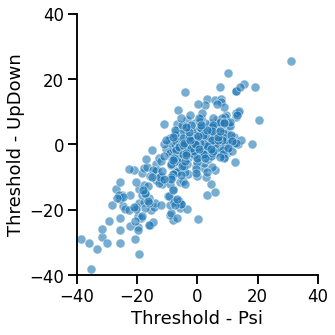

In [8]:
sns.set_context('talk')
sns.relplot(data=behavior_df, x='Threshold', y='Threshold_UpDown', alpha=0.6)
plt.xlim(-40, 40)
plt.ylim(-40, 40)
plt.ylabel('Threshold - UpDown')
plt.xlabel('Threshold - Psi')
plt.tight_layout()
plt.savefig('threshold.png')

# Del2

**HRD2**
* Subject 20, 21, 29, 30, 36, 40, 41, 43, 48, 51, 54, 55, 62, 69, 75, 77, 88, 91, 105, 110, 111, 129, 155, 158, 182, 199, 205, 221, 227, 239, 256: data missing

*Logs:*
* Subject 123: data missing but should be present.

- Remove subject 139 (psychiatric symptoms)

This script will import raw data from AUX and build a local database containing only essential files for further preprocessing. You can select where to store these file by changing `localPath`.

In [9]:
datapath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data', 'raw', 'HRD2')

outputpath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data')
session = 'Del2'
subjects = os.listdir(datapath)

In [10]:
remove = []

Merge dataframes

In [11]:
for data_quality in ['filtered', 'raw']:
    merged_df = pd.DataFrame([])  # Concatenated raw data
    for sub in subjects:
        df = pd.read_csv(os.path.join(datapath, sub, data_quality + '.txt'))
        df["Subject"] = sub
        merged_df = merged_df.append(df, ignore_index=True)
    
    # Remove particpants
    for sub_rm in remove:
        merged_df = merged_df[merged_df.Subject != sub_rm]
    
    # Save data frame
    merged_df.to_csv(
        os.path.join(
            outputpath, 'merged_Del2' + data_quality + '.txt'),
        index=False)

Extract summary statistics

In [12]:
def reversals(df):
    d = np.diff(df.Alpha.to_numpy())
    reversals = d[:-1] != d[1:]
    return np.median(df.Alpha.to_numpy()[1:-1][reversals])

In [13]:
for data_quality in ['filtered', 'raw']:

    group_df = pd.read_csv(
        os.path.join(outputpath, 'merged_Del2' + data_quality + '.txt'))
    behavior_df = pd.DataFrame([])

    for sub in group_df['Subject'].unique():
        
        taskDuration = (
            group_df[group_df.Subject == sub]["StartListening"].iloc[-1] -
                group_df[group_df.Subject == sub]["StartListening"].iloc[0]
            ) / 60
        
        for modality in ["Intero", "Extero"]:

            this_df = group_df[(group_df.Subject == sub) & (group_df.Modality == modality)]

            threshold, slope = (
                this_df.EstimatedThreshold.iloc[-1],
                this_df.EstimatedSlope.iloc[-1],
            )
            estimationRT, confidenceRT = (
                this_df[f"DecisionRT"].median(),
                this_df.ConfidenceRT.median(),
            )
            accuracy, confidence = (
                this_df["ResponseCorrect"].mean() * 100,
                this_df["Confidence"].mean(),
            )
            
            # Threshold from up/down staircase
            threshold_updown = np.mean([
                reversals(this_df[this_df.StairCond=='low']),
                reversals(this_df[this_df.StairCond=='high'])
            ]) if data_quality == 'raw' else None

            # d prime and criterion
            try:
                this_df.loc[:, "Stimuli"] = this_df.responseBPM > this_df.listenBPM
                this_df.loc[:, "Responses"] = this_df["Decision"] == "More"
                d, c = this_df.dprime(), this_df.criterion()
            except:
                print(f'Not enough data to compute d prime and criterion for subject {sub}')
                d, c = None, None
            
            if data_quality is 'raw':
                ratio = ((this_df.Alpha - this_df.EstimatedThreshold).loc[-40:] > 0).mean()
                corruption_ratio = np.abs(ratio-0.5)*2
            else:
                corruption_ratio = None

            behavior_df = behavior_df.append(
                {
                    "Subject": sub,
                    "Modality": modality,
                    "Accuracy": accuracy,
                    "Confidence": confidence,
                    "Threshold": threshold,
                    "Threshold_UpDown": threshold_updown,
                    "Slope": slope,
                    "TaskDuration": taskDuration,
                    "DecisionRT": estimationRT,
                    "ConfidenceRT": confidenceRT,
                    "dPrime": d,
                    "Criterion": c,
                    "Corruption": corruption_ratio,
                },
                ignore_index=True,
            )

    # Save data frame
    behavior_df.to_csv(
        os.path.join(
            outputpath, session + '_behavior_' + data_quality + '.txt'),
        index=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarni

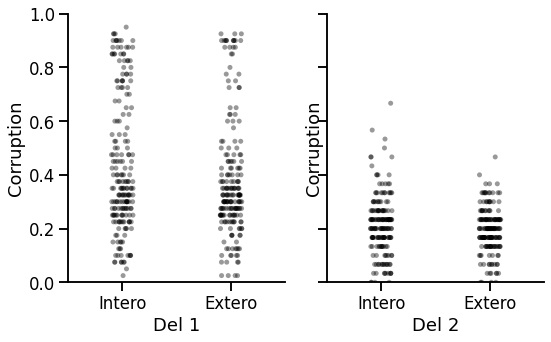

In [81]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

behavior_df = pd.read_csv(outputpath + '/Del1_behavior_raw.txt')
#sns.boxplot(data=behavior_df, y='Corruption', width=0.2, ax=ax[0])
sns.stripplot(data=behavior_df, y='Corruption', x='Modality', color='k', alpha=0.4, ax=ax[0])
ax[0].set_xlabel('Del 1')

behavior_df = pd.read_csv(outputpath + '/Del2_behavior_raw.txt')
#sns.boxplot(data=behavior_df, y='Corruption', width=0.2, ax=ax[1])
sns.stripplot(data=behavior_df, y='Corruption', x='Modality', color='k', alpha=0.4, ax=ax[1])
ax[1].set_xlabel('Del 2')

plt.tight_layout()
plt.ylim(0, 1)
sns.despine()
plt.savefig('Corruption.png')

In [45]:
behavior_df1 = pd.read_csv(outputpath + '/Del1_behavior_raw.txt')
behavior_df2 = pd.read_csv(outputpath + '/Del2_psychophysics.txt')

In [83]:
behavior_df1[behavior_df1['Corruption'] < .7]

,Accuracy,Confidence,ConfidenceRT,Corruption,Criterion,DecisionRT,Modality,Slope,Subject,TaskDuration,Threshold,Threshold_UpDown,dPrime,Condition
1,81.250000,64.662500,0.851656,0.375,-0.063918,1.880845,Extero,11.042193,sub_0019,29.292084,4.775694,-3.25,1.774720,Extero
2,56.250000,39.337500,0.882860,0.425,-0.598950,3.690408,Intero,16.118555,sub_0020,32.760295,-19.200669,-13.50,1.365203,Intero
3,68.750000,43.362500,0.791728,0.625,0.177995,2.865583,Extero,17.315870,sub_0020,32.760295,6.850551,2.75,1.116642,Extero
4,83.544304,63.582278,0.820442,0.250,-0.381009,2.614414,Intero,12.064374,sub_0022,28.950561,2.185112,-7.25,2.205062,Intero
5,87.341772,74.848101,0.725788,0.375,-0.126800,2.014646,Extero,13.371218,sub_0022,28.950561,-3.217265,-0.25,2.219705,Extero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,75.000000,47.975000,0.924735,0.300,-0.099714,1.873842,Intero,17.145253,sub_0254,30.798865,3.125021,4.50,1.370643,Intero
411,86.075949,56.012821,0.786044,0.125,0.277320,1.664876,Extero,11.394649,sub_0254,30.798865,1.154808,6.00,2.412439,Extero
412,54.430380,58.240506,1.138033,0.600,-0.442974,3.566047,Intero,17.735624,sub_0255,32.001961,-18.306203,-21.75,1.048896,Intero
413,80.000000,60.312500,0.927340,0.375,0.018070,2.132600,Extero,13.317349,sub_0255,32.001961,7.459916,4.00,1.687129,Extero


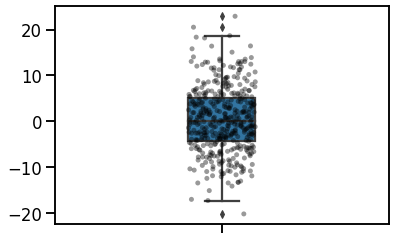

In [75]:
sns.boxplot(y=(behavior_df1['Threshold'] - behavior_df1['Threshold_UpDown']), width=.2)
sns.stripplot(y=(behavior_df1['Threshold'] - behavior_df1['Threshold_UpDown']), color='k', alpha=.4)

plt.savefig('Corruption.png')

In [46]:
behavior_df1['Condition'] = behavior_df1['Modality']

In [47]:
behavior_df2['Modality'] = behavior_df2['Condition']

In [48]:
corr_df = pd.merge(behavior_df1[['Subject', 'Modality', 'Threshold_UpDown']], behavior_df2[['Subject', 'Modality', 'BayesianThresholdCN']], on=['Subject', 'Modality'])

In [56]:
df1 = pd.read_csv(outputpath + '/Del1_behavior_raw.txt')
for sub in df1[df1.Corruption > .5].Subject.unique():
    corr_df = corr_df[corr_df.Subject != sub]

df2 = pd.read_csv(outputpath + '/Del2_behavior_raw.txt')
for sub in df2[df2.Corruption > .5].Subject.unique():
    corr_df = corr_df[corr_df.Subject != sub]

corr_df

,Subject,Modality,Threshold_UpDown,BayesianThresholdCN
2,sub_0022,Intero,-7.25,-30.444
3,sub_0022,Extero,-0.25,-2.228
8,sub_0025,Intero,-19.00,-24.023
9,sub_0025,Extero,-2.75,-7.350
10,sub_0026,Intero,-4.25,2.311
...,...,...,...,...
341,sub_0251,Extero,5.25,0.323
342,sub_0252,Intero,1.00,3.238
343,sub_0252,Extero,2.50,1.369
346,sub_0254,Intero,4.50,-0.230


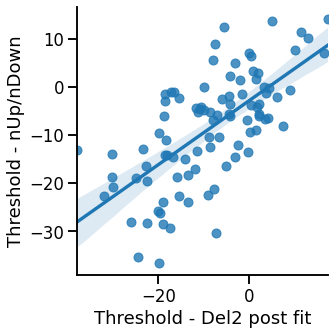

In [57]:
sns.set_context('talk')
sns.lmplot(data=corr_df[corr_df.Modality=='Intero'], x='Threshold_UpDown', y='BayesianThresholdCN')
#plt.xlim(-40, 20)
#plt.ylim(-40, 20)
plt.ylabel('Threshold - nUp/nDown')
plt.xlabel('Threshold - Del2 post fit')
plt.tight_layout()
plt.savefig('test-retest.png')

In [58]:
import pingouin as pg
pg.corr(x=corr_df[corr_df.Modality=='Intero'].Threshold_UpDown, y=corr_df[corr_df.Modality=='Intero'].BayesianThresholdCN, method='skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,94,0,0.668354,"[0.54, 0.77]",0.446697,0.434536,1.839150e-13,1.0


In [63]:
corr_df['Difference'] = (corr_df.BayesianThresholdCN_x - corr_df.BayesianThresholdCN_y).abs()
corr_df[corr_df['Difference']>15]

,Subject,Condition,BayesianThresholdCN_x,BayesianThresholdCN_y,Difference
2,sub_0022,Intero,-2.206,-30.444,28.238
18,sub_0032,Intero,-20.441,-2.443,17.998
20,sub_0034,Intero,-0.532,-17.028,16.496
22,sub_0035,Intero,4.771,-14.714,19.485
36,sub_0049,Intero,-6.091,-22.551,16.460
50,sub_0060,Intero,-35.541,-13.227,22.314
80,sub_0082,Intero,-1.757,13.602,15.359
102,sub_0098,Intero,-8.516,-26.201,17.685
104,sub_0099,Intero,-19.918,-35.468,15.550
142,sub_0126,Intero,-12.676,5.593,18.269


## Task descriptive stats

In [6]:
group_df = pd.read_csv(path + '/data/behavior.txt')

In [7]:
print(f'Number of participants: {len(group_df.Subject.unique())}')
del1 = len(group_df[group_df.Session=='Del1'].Subject.unique())
print(f'Del 1: {del1}')

Number of participants: 213
Del 1: 213


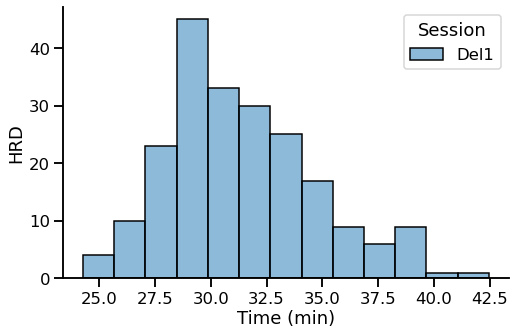

In [8]:
sns.set_context('talk')
plt.figure(figsize=(8, 5))
sns.histplot(data=group_df[group_df.Modality=='Intero'],
             x='TaskDuration', hue='Session')
plt.xlabel('Time (min)')
plt.ylabel('HRD')
sns.despine()

In [14]:
print(f'Task mean time: {round(group_df.TaskDuration.mean(), 2)} min')
print(f'Task std time: {round(group_df.TaskDuration.std(), 2)} min')
print(f'Task max time: {round(group_df.TaskDuration.max(), 2)} min')
print(f'Task min time: {round(group_df.TaskDuration.min(), 2)} min')

Task mean time: 31.38 min
Task std time: 3.34 min
Task max time: 42.46 min
Task min time: 24.27 min
